# TOP11 Machine learning model (JobFair Challenge)

## 1. Problem definition        
   We have to predict what percentage of users will return to the game day after the registration. This KPI is officially known as **Retention Day 1**. 
## 2. Data
   We've got <u> time series data </u> from 02.06.2022. to 15.09.2022. For data from 31.08.2022 to 15.09.2022. we have to predict tagret variable (**returned**).
## 3. Evaluation
   Our result will be evaluated by **RMSE**(Root Mean Squared Error) for the period after 31.08.2022. So we will definitely use the regression model. We're going to make validation set to check our model. Less RMSE = better model
## 4. Features
        Features are Key Performance Indicators (KPI):
        registration_type:
                            1 = Fresh Registration 
                            2 = Inactive ReRegistration
                            3 = Active ReRegistration
       played_t11_before:
                           0 = data not provided
                           1 = user says he played T11 before
                           2 = user says he didn't play T11 before
       registration_channel: Label that marks if the new user was targeted by any T11 marketing campaigns, before installing the game.
                           0 = data not provided
                           1 = Organic
                           2 = Paid             
      network_type:
                    0 = data not provided
                    1 = WIFI
                    2 = LTE (4G)
                    3 = HSPAP (3G)               
      device_tier: Our internal label for the quality of the device used for playing the game
                    0 = data not provided
                    1 = LowestEnd
                    2 = LowEnd
                    3 = MidEnd
                    4 = HighEnd
      device_type:
                     1 = Phone
                     2 = Tablet
      device_manufacturer:
                        0 = Other + data not provided
                        1 = Samsung
                        2 = Xiaomi
                        3 = OPPO
                        4 = Huawei
                        5 = Motorola
                        6 = Vivo
                        7 = Realme
                        8 = INFINIX MOBILITY LIMITED
                        9 = LGE
                        10 = TECNO MOBILE LIMITED
                        11 = Lenovo
                        12 = OnePlus
                        13 = TCL
        screen_dpi
        device_memory_size_mb
        device_model
        os_version
        registrations

## 5. Model
   We're going to use the regression model. We'll start with RandomForestRegressor and choose one with the best score in the end.      
## 6. Experiments   
   We're trying different models, manually parameters tuning and different way to fill missing values:
   https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

# Import libraries

In [2]:
%pip install seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     --------------- ---------------------- 122.9/293.3 kB 3.6 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

# Import data

In [2]:
df = pd.read_csv("2. job_fair_retention_prediction_2022_training.csv", parse_dates=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342332 entries, 0 to 342331
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   342332 non-null  object 
 1   registration_type      342332 non-null  int64  
 2   played_t11_before      342332 non-null  int64  
 3   registration_channel   342332 non-null  int64  
 4   network_type           342332 non-null  int64  
 5   device_tier            342332 non-null  int64  
 6   device_type            342332 non-null  int64  
 7   device_manufacturer    342332 non-null  int64  
 8   screen_dpi             340442 non-null  float64
 9   device_memory_size_mb  340442 non-null  float64
 10  device_model           340442 non-null  object 
 11  os_version             340442 non-null  object 
 12  registrations          342332 non-null  int64  
 13  returned               342332 non-null  int64  
dtypes: float64(2), int64(9), object(3)
m

In [4]:
df.isnull().sum()

date                        0
registration_type           0
played_t11_before           0
registration_channel        0
network_type                0
device_tier                 0
device_type                 0
device_manufacturer         0
screen_dpi               1890
device_memory_size_mb    1890
device_model             1890
os_version               1890
registrations               0
returned                    0
dtype: int64

In [5]:
df.describe()

,registration_type,played_t11_before,registration_channel,network_type,device_tier,device_type,device_manufacturer,screen_dpi,device_memory_size_mb,registrations,returned
count,342332.000000,342332.000000,342332.000000,342332.000000,342332.000000,342332.000000,342332.000000,340442.000000,340442.000000,342332.000000,342332.000000
mean,1.577337,1.028610,1.538071,1.272867,2.927082,1.105301,2.326283,359.056964,3996.317517,1.567829,0.406874
std,0.804206,0.892683,0.566776,0.573181,1.028048,0.306942,2.551360,88.342857,1896.398925,1.651584,0.716612
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,80.000000,452.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,315.000000,2789.000000,1.000000,0.000000
50%,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,2.000000,320.000000,3680.000000,1.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,4.000000,1.000000,3.000000,440.000000,5572.000000,1.000000,1.000000
max,3.000000,2.000000,2.000000,3.000000,4.000000,2.000000,13.000000,999.000000,17205.000000,70.000000,22.000000


In [6]:
df.head()

,date,registration_type,played_t11_before,registration_channel,network_type,device_tier,device_type,device_manufacturer,screen_dpi,device_memory_size_mb,device_model,os_version,registrations,returned
0,2022-06-02,3,0,1,1,3,1,2,320.0,2820.0,Xiaomi Redmi 7,Android OS 10 / API-29,1,1
1,2022-06-02,1,2,1,1,4,1,0,480.0,2740.0,OMIX OMIX X300,Android OS 11 / API-30,1,0
2,2022-06-02,3,0,1,1,3,1,1,315.0,3571.0,samsung SM-M215F,Android OS 11 / API-30,1,0
3,2022-06-02,1,2,2,1,2,1,10,320.0,3774.0,TECNO MOBILE LIMITED TECNO KC3,Android OS 9 / API-28,1,1
4,2022-06-02,1,2,2,1,1,1,1,320.0,889.0,samsung SM-A013G,Android OS 10 / API-29,1,0


* We mustn't shuffle data because we have time series data and some date are in more than one rows
* Our dataset has missing values and non numeric values.

# Exploratory data analysis (EDA)

In [7]:
df.screen_dpi.median()

320.0

In [8]:
df.screen_dpi.mode()

0    320.0
Name: screen_dpi, dtype: float64

In [9]:
df.os_version.value_counts()

Android OS 11 / API-30       104801
Android OS 10 / API-29        80577
Android OS 12 / API-31        54064
Android OS 9 / API-28         35797
Android OS 8.1.0 / API-27     16038
                              ...  
Android OS 5.0 / API-19           1
Android OS 8.1.1 / API-22         1
Android OS 4.4 / API-19           1
Android OS 7.0.0 / API-22         1
Android OS 10.0 / API-28          1
Name: os_version, Length: 79, dtype: int64

In [10]:
df.tail()

,date,registration_type,played_t11_before,registration_channel,network_type,device_tier,device_type,device_manufacturer,screen_dpi,device_memory_size_mb,device_model,os_version,registrations,returned
342327,2022-09-15,1,1,2,2,2,1,11,480.0,2848.0,LENOVO Lenovo K53a48,Android OS 7.0 / API-24,1,0
342328,2022-09-15,2,0,2,1,4,1,1,420.0,7443.0,samsung SM-N985F,Android OS 12 / API-31,3,0
342329,2022-09-15,1,1,1,1,3,1,4,320.0,3688.0,HUAWEI MAR-LX1A,Android OS 10 / API-29,1,0
342330,2022-09-15,1,1,1,1,4,1,0,480.0,3748.0,OMIX OMIX X500,Android OS 11 / API-30,2,0
342331,2022-09-15,1,1,2,2,4,1,2,440.0,5613.0,Xiaomi M2101K7BG,Android OS 11 / API-30,2,0


In [11]:
df.device_model.value_counts()

Xiaomi Redmi Note 8 Pro    7380
Xiaomi Redmi Note 8        6643
samsung SM-G610F           5001
Xiaomi M2003J15SC          4735
Xiaomi Redmi Note 9 Pro    4050
                           ... 
samsung SM-J410G              1
LEFE Blade X9                 1
OnePlus IV2201                1
SNCOIA QT19101                1
HUAWEI VKY-AL00               1
Name: device_model, Length: 3236, dtype: int64

In [12]:
df.device_memory_size_mb.mode()

0    3679.0
Name: device_memory_size_mb, dtype: float64

In [13]:
df.device_memory_size_mb.median()

3680.0

<Axes: >

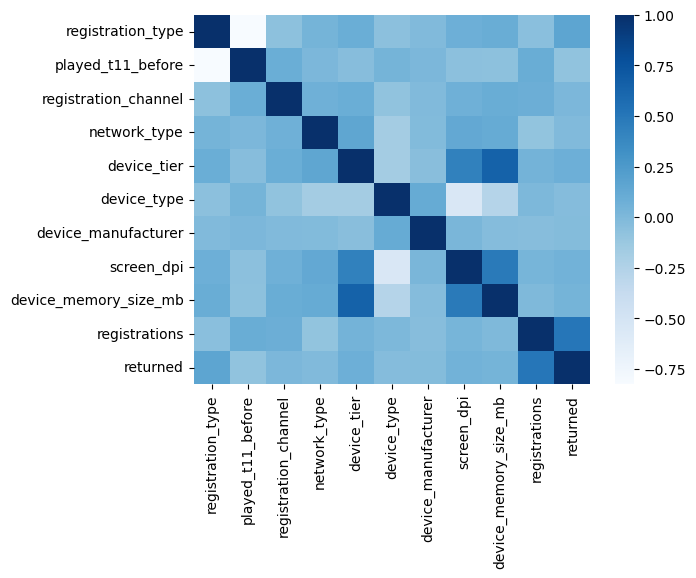

In [25]:
correlation = df.corr()
sns.heatmap(correlation, linecolor='white', cmap ="Blues")

 * The missing values in columns 'device_memory_size' and 'screen_dpi' we are going to fill up with median value.
 * Rows with missing values in 'device_model' and 'os_version', we are going to delete, because I am not sure how it will affect on result if I fill it up with the most common values.
 * We have enough data, so we know that for machine learning is better to have more data but firstly, I will try in this way.

## Fill missing data

### 'Device_memory_size_mb'

In [26]:
df['device_memory_size_mb'] = df['device_memory_size_mb'].fillna(df['device_memory_size_mb'].median())


### 'Screen_dpi'

In [27]:
df['screen_dpi'] = df['screen_dpi'].fillna(df['screen_dpi'].median())


In [28]:
df.isna().sum()
df2 = df.copy()

In [29]:
df.dropna(axis=0, how='any', inplace=True)


* Try to fill it up with 'missing' for the experimentation

In [30]:
df2['device_model'] = df2['device_model'].fillna("missing")
df2['os_version'] = df2['os_version'].fillna("missing")

In [31]:
df2.isna().sum(), df2.shape

(date                     0
 registration_type        0
 played_t11_before        0
 registration_channel     0
 network_type             0
 device_tier              0
 device_type              0
 device_manufacturer      0
 screen_dpi               0
 device_memory_size_mb    0
 device_model             0
 os_version               0
 registrations            0
 returned                 0
 dtype: int64,
 (342332, 14))

In [32]:
df.isnull().sum(), df.shape

(date                     0
 registration_type        0
 played_t11_before        0
 registration_channel     0
 network_type             0
 device_tier              0
 device_type              0
 device_manufacturer      0
 screen_dpi               0
 device_memory_size_mb    0
 device_model             0
 os_version               0
 registrations            0
 returned                 0
 dtype: int64,
 (340442, 14))

## Make new features due to finding time patterns in data

In [33]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['day_of_week'] = pd.DatetimeIndex(df['date']).dayofweek
df['day_of_month'] = pd.DatetimeIndex(df['date']).day

In [34]:
df2['month'] = pd.DatetimeIndex(df2['date']).month
df2['day_of_week'] = pd.DatetimeIndex(df2['date']).dayofweek
df2['day_of_month'] = pd.DatetimeIndex(df2['date']).day

In [35]:
df.isnull().sum(), df.shape, df2.shape

(date                     0
 registration_type        0
 played_t11_before        0
 registration_channel     0
 network_type             0
 device_tier              0
 device_type              0
 device_manufacturer      0
 screen_dpi               0
 device_memory_size_mb    0
 device_model             0
 os_version               0
 registrations            0
 returned                 0
 month                    0
 day_of_week              0
 day_of_month             0
 dtype: int64,
 (340442, 17),
 (342332, 17))

In [36]:
df[10000:10015]

,date,registration_type,played_t11_before,registration_channel,network_type,device_tier,device_type,device_manufacturer,screen_dpi,device_memory_size_mb,device_model,os_version,registrations,returned,month,day_of_week,day_of_month
10061,2022-06-05,1,2,2,1,3,1,1,320.0,2827.0,samsung SM-N910C,Android OS 6.0.1 / API-23,2,0,6,6,5
10062,2022-06-05,3,0,0,1,3,1,4,480.0,3678.0,HUAWEI PPA-LX2,Android OS 10 / API-29,1,1,6,6,5
10063,2022-06-05,1,2,2,1,3,1,1,280.0,1724.0,samsung SM-A105FN,Android OS 10 / API-29,2,0,6,6,5
10064,2022-06-05,1,2,2,2,2,1,4,480.0,3788.0,HUAWEI WAS-LX1A,Android OS 8.0.0 / API-26,1,1,6,6,5
10065,2022-06-05,1,2,2,1,2,1,0,280.0,2791.0,General Mobile G300,Android OS 10 / API-29,1,0,6,6,5
10066,2022-06-05,1,1,1,1,1,1,1,240.0,1407.0,samsung SM-G532F,Android OS 6.0.1 / API-23,2,0,6,6,5
10067,2022-06-05,1,2,2,0,4,1,2,440.0,5630.0,Xiaomi M2007J20CG,Android OS 11 / API-30,1,1,6,6,5
10068,2022-06-05,1,2,1,2,4,1,4,480.0,5689.0,HUAWEI JNY-LX1,Android OS 10 / API-29,1,0,6,6,5
10069,2022-06-05,3,0,2,2,2,1,1,280.0,1791.0,samsung SM-A107F,Android OS 11 / API-30,2,1,6,6,5
10070,2022-06-05,3,0,2,0,4,1,7,320.0,3784.0,realme RMX3269,Android OS 11 / API-30,1,1,6,6,5


In [37]:
df['device_brand'] = df['device_model'].str.split(' ').str[0]

In [38]:
df.drop('device_brand', axis=1, inplace=True)
# I've realized so late we have similar column

In [39]:
df.shape

(340442, 17)

* **Make a column which shows whether day is in the first or in the second part of month**

In [40]:
new_column = []

for day in df['day_of_month'].values:
    if day <= 15:
        new_column.append(1)
    else:
        new_column.append(2)
        
df["part_of_month"] = new_column

In [41]:
count1 =0
count2 =0
for i in range(len(new_column)):
    if new_column[i]==2:
        count1=count1+1
    else:
        count2=count2+1
print(count2),
print(count1)

182921
157521


### Split data into training and test sets

   We're going to make train and test sets, and then see correlations in the training dataset. After that we have turn everything into numbers, split df_train into train and validation (10% of the train set) and try to fit data into the model,m

In [42]:
df.month.value_counts()

8    102381
7     96067
6     92960
9     49034
Name: month, dtype: int64

In [43]:
df_test = df[df.month == 9]
df_train = df[df.month != 9]
df2_test = df2[df2.month == 9]
df2_train = df2[df2.month != 9]

In [44]:
len(df_test), len(df_train), df_test.shape, df_train.shape

(49034, 291408, (49034, 18), (291408, 18))

In [45]:
len(df2_test), len(df2_train), df2_test.shape, df2_train.shape

(49281, 293051, (49281, 17), (293051, 17))

In [46]:
df_train.head(5)

,date,registration_type,played_t11_before,registration_channel,network_type,device_tier,device_type,device_manufacturer,screen_dpi,device_memory_size_mb,device_model,os_version,registrations,returned,month,day_of_week,day_of_month,part_of_month
0,2022-06-02,3,0,1,1,3,1,2,320.0,2820.0,Xiaomi Redmi 7,Android OS 10 / API-29,1,1,6,3,2,1
1,2022-06-02,1,2,1,1,4,1,0,480.0,2740.0,OMIX OMIX X300,Android OS 11 / API-30,1,0,6,3,2,1
2,2022-06-02,3,0,1,1,3,1,1,315.0,3571.0,samsung SM-M215F,Android OS 11 / API-30,1,0,6,3,2,1
3,2022-06-02,1,2,2,1,2,1,10,320.0,3774.0,TECNO MOBILE LIMITED TECNO KC3,Android OS 9 / API-28,1,1,6,3,2,1
4,2022-06-02,1,2,2,1,1,1,1,320.0,889.0,samsung SM-A013G,Android OS 10 / API-29,1,0,6,3,2,1


## Check correlations between target and features values in train data

#### Date vs returned (returned/registrations)

<Axes: xlabel='date', ylabel='number of returned player/date'>

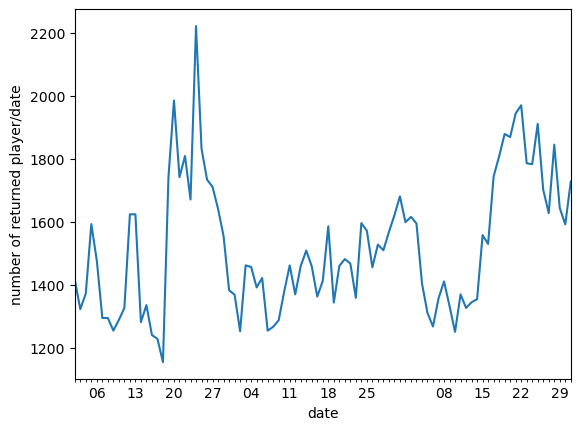

In [47]:
df_train_analysis = df_train.copy()
df_train_analysis['date'] = pd.to_datetime(df_train_analysis['date'])
df_train_analysis['returned'].groupby(df_train_analysis['date'].dt.to_period('d')).sum().plot(kind='line', ylabel='number of returned player/date', xlabel='date', xticks=[])

* We can see that 'returned' values are lower in the first half of months and that we have the highest range of 'returned' in June

In [51]:
df_train_analysis['Retention Day 1'] = df_train_analysis['returned']/df_train_analysis['registrations']
#fig, ax = plt.subplots()
#ax.scatter(df_train_analysis['device_memory_size_mb'], df_train_analysis['Retention Day 1'])

In [52]:
df2_train = df2_train[ (df2_train['returned'] < 20) & (df2_train['registrations'] < 60)] 

So that aren't good plots, but I've tried to parse dates and I haven't gotten better one.
Only what I see from plots and cross tab(month vs returned) is that returned = 22 is outlier, or maybe all values greater than 15

In [56]:
#df_train_analysis.plot(x='day_of_month', y='returned',kind='line');

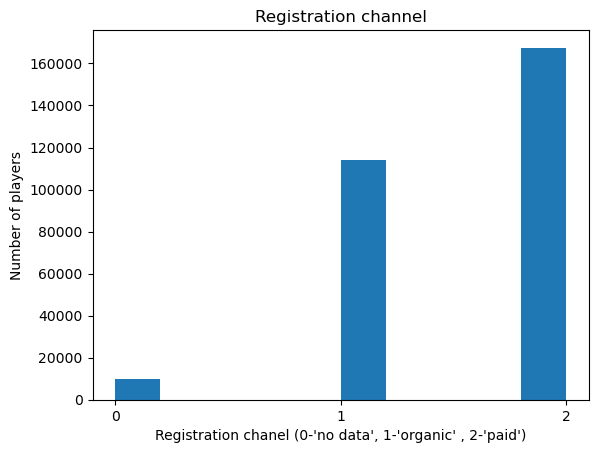

In [57]:
fig, ax = plt.subplots()
ax.hist(df_train.registration_channel)
ax.set(title = "Registration channel",
       xlabel = "Registration chanel (0-'no data', 1-'organic' , 2-'paid')",
       ylabel = "Number of players")
plt.xticks([0,1,2]);

We can see that most of new users were targeted by any T11 marketing campaigns, before the installing the game.

#### Month vs returned (returned/registrations)

<Axes: xlabel='month', ylabel='number of returned player'>

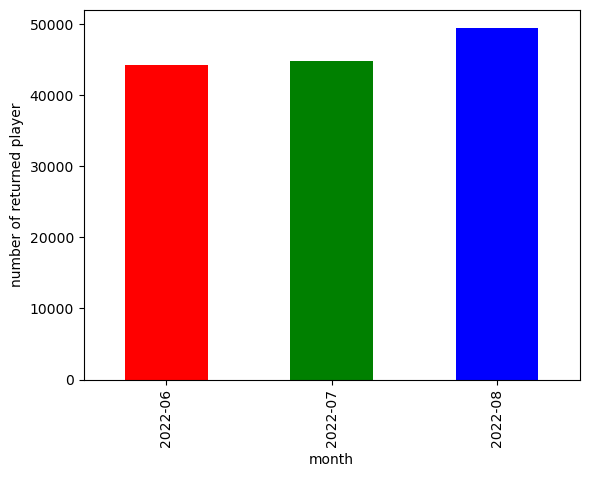

In [58]:
df_train_analysis['returned'].groupby(df_train_analysis['date'].dt.to_period('M')).sum().plot(kind='bar', ylabel='number of returned player', xlabel='month', color=['red', 'green', 'blue'])

<Axes: xlabel='month', ylabel='number of registered player'>

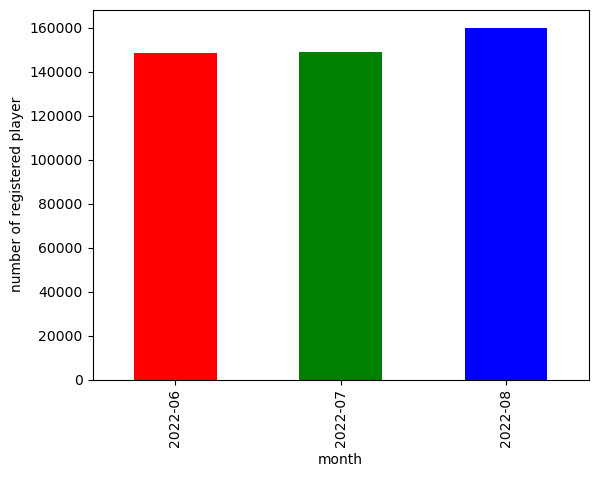

In [59]:
df_train_analysis['registrations'].groupby(df_train_analysis['date'].dt.to_period('M')).sum().plot(kind='bar', ylabel='number of registered player', xlabel='month', color=['red', 'green', 'blue'])

<Axes: xlabel='month', ylabel='Retention Day 1'>

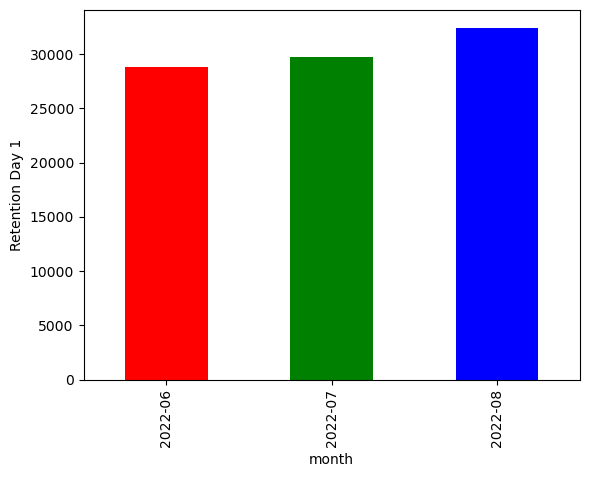

In [60]:
df_train_analysis['Retention Day 1'].groupby(df_train_analysis['date'].dt.to_period('M')).sum().plot(kind='bar', ylabel='Retention Day 1', xlabel='month', color=['red', 'green', 'blue'])

* We have the most of registrated and returned players in august, and the highest ratio 'returned'/'registration'

In [61]:
pd.crosstab(df_train_analysis.registration_type, df_train_analysis.returned)

returned,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,22
registration_type,,,,,,,,,,,,,,,,,,,
1,119913,53196,6277,1654,611,232,145,51,38,22,12,3,3,2,0,0,0,0,0
2,38826,11293,796,128,23,4,1,0,0,0,0,0,0,0,0,0,0,0,0
3,20455,31206,4228,1260,490,237,129,58,49,26,14,5,6,5,6,1,1,1,1


<Axes: xlabel='registration_type'>

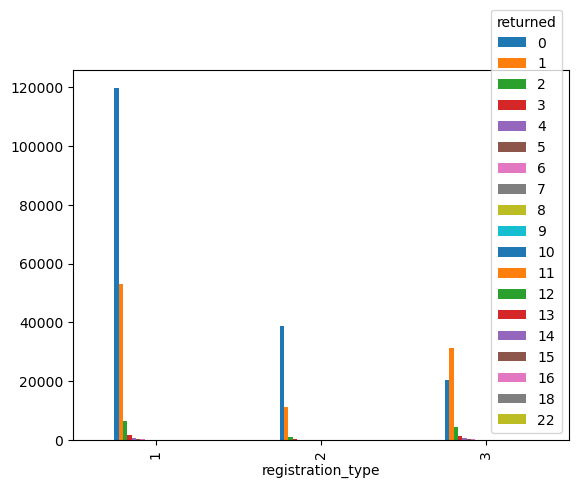

In [62]:
pd.crosstab(df_train_analysis.registration_type, df_train_analysis.returned).plot(kind='bar')

#### Retention Day 1 

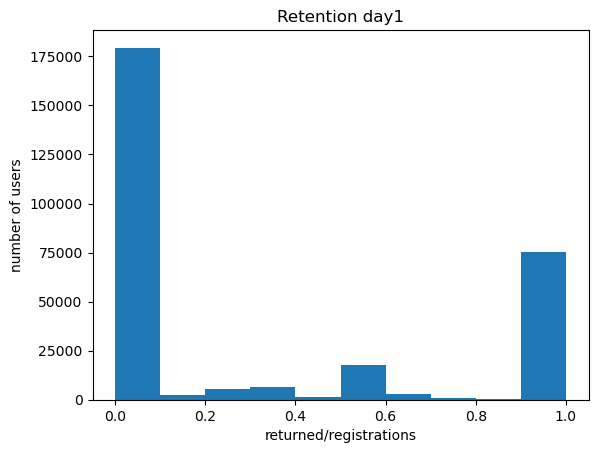

In [63]:
fig, ax = plt.subplots()
ax.hist((df_train_analysis.returned/df_train_analysis.registrations));
ax.set(title="Retention day1",
      xlabel="returned/registrations",
      ylabel="number of users");

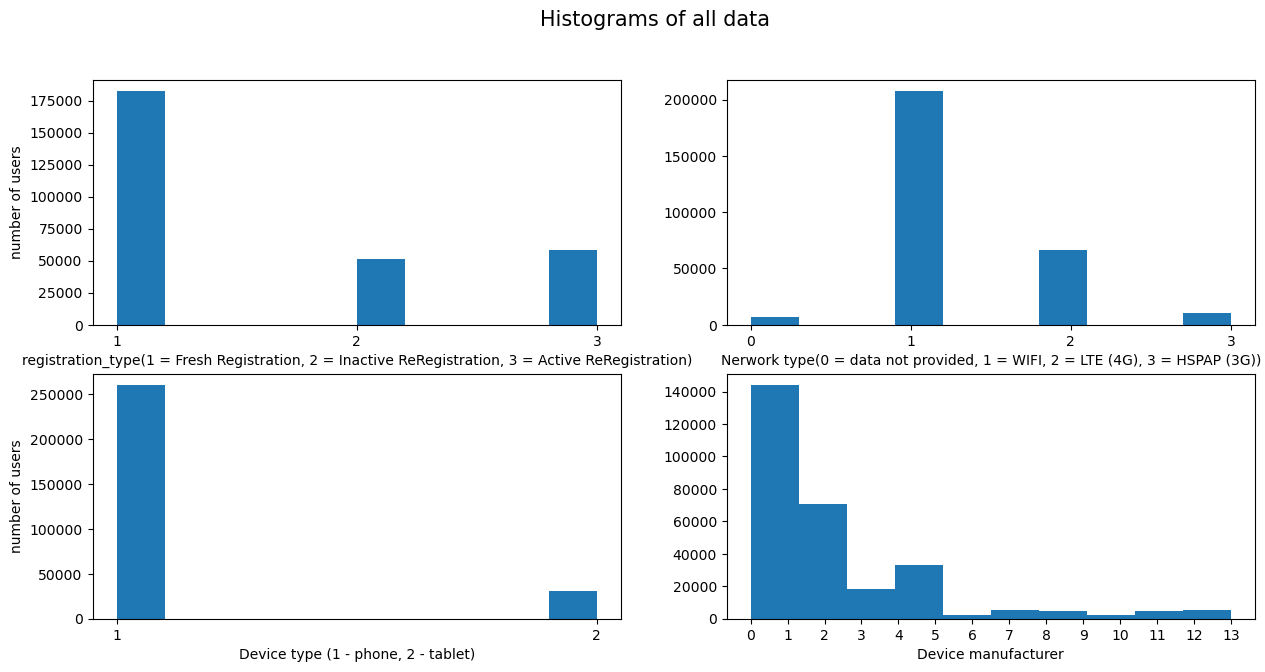

In [64]:
fig,((ax1, ax2),(ax3, ax4))=plt.subplots(nrows=2,
                                         ncols=2,
                                        figsize=(15,7))
fig. suptitle("Histograms of all data", fontsize=15)
ax1.hist(df_train_analysis.registration_type)
ax1.set(xlabel="registration_type(1 = Fresh Registration, 2 = Inactive ReRegistration, 3 = Active ReRegistration)",
       ylabel="number of users")
ax1.set_xticks([1,2,3])
ax2.hist(df_train_analysis.network_type)
ax2.set_xticks([0,1,2,3])
ax2.set(xlabel="Nerwork type(0 = data not provided, 1 = WIFI, 2 = LTE (4G), 3 = HSPAP (3G))")
ax3.hist(df_train_analysis.device_type)
ax3.set_xticks([1,2])
ax3.set(xlabel='Device type (1 - phone, 2 - tablet)',
       ylabel="number of users")
ax4.hist(df_train_analysis.device_manufacturer)
ax4.set_xticks(range(0,14));
ax4.set(xlabel="Device manufacturer");

In [65]:
df_train_returned_over_5 = df_train_analysis[df_train_analysis.returned>5]
df_train_returned_over_5.shape

(579, 19)

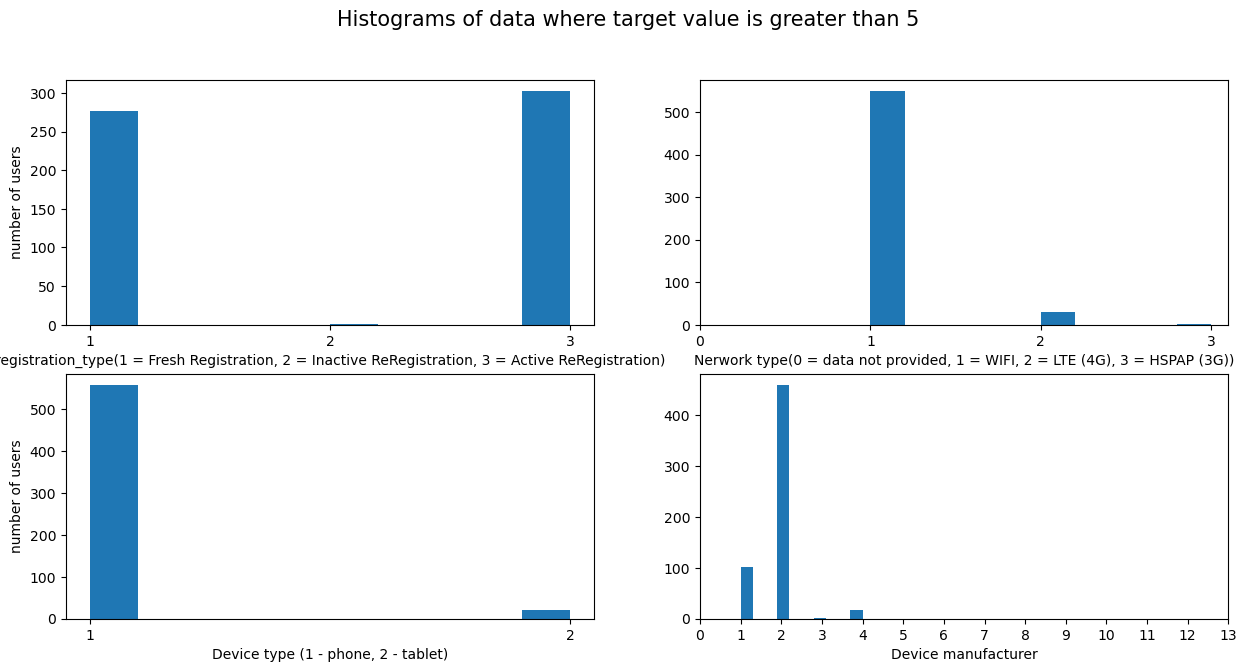

In [66]:
fig,((ax1, ax2),(ax3, ax4))=plt.subplots(nrows=2,
                                         ncols=2,
                                        figsize=(15,7))
fig. suptitle("Histograms of data where target value is greater than 5", fontsize=15)
ax1.hist(df_train_returned_over_5.registration_type)
ax1.set(xlabel="registration_type(1 = Fresh Registration, 2 = Inactive ReRegistration, 3 = Active ReRegistration)",
       ylabel="number of users")
ax1.set_xticks([1,2,3])
ax2.hist(df_train_returned_over_5.network_type)
ax2.set_xticks([0,1,2,3])
ax2.set(xlabel="Nerwork type(0 = data not provided, 1 = WIFI, 2 = LTE (4G), 3 = HSPAP (3G))")
ax3.hist(df_train_returned_over_5.device_type)
ax3.set_xticks([1,2])
ax3.set(xlabel='Device type (1 - phone, 2 - tablet)',
       ylabel="number of users")
ax4.hist(df_train_returned_over_5.device_manufacturer)
ax4.set_xticks(range(0,14));
ax4.set(xlabel="Device manufacturer");

C:\Users\USER\Desktop\TOP11\env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


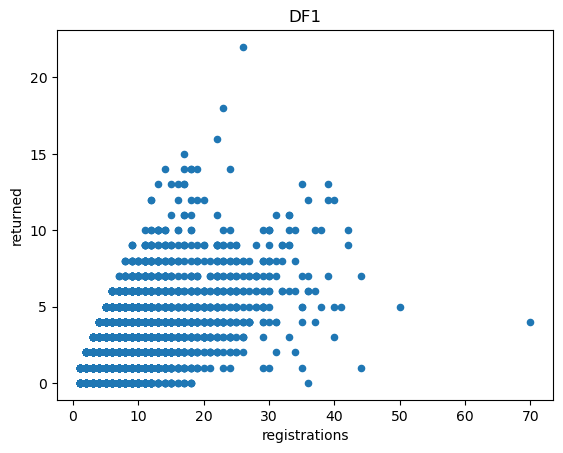

In [67]:
df_train_analysis.plot(x = 'registrations', y = 'returned', kind = 'scatter', title = 'DF1');

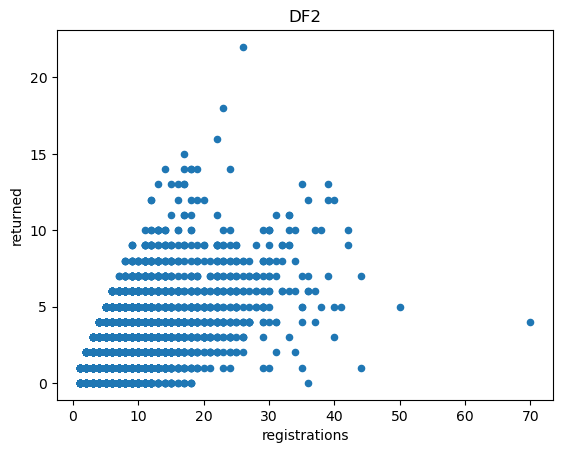

In [68]:
df_train_analysis.plot(x = 'registrations', y = 'returned', kind = 'scatter', title='DF2');

 We can see correlation between registrations and returned but there are a lot of exceptions.
#### Every time when I tried to plot kind='bar' my kernel chashed... Maybe because of the amount of data?
So from plots(our data) we can conclude :

                                         Most of our users are 'fresh registrations'.
                                         Most of them use Wifi and phone.
                                         Most of them are samsung users.
and our plot data where target values are greater than 5 shows (case of individual rows not grouped by date):
                                         
                                         Most of our returned users are Active Reregistrations,
                                         use WIFI on the phone and they are Xiaomi users


# Turning data into numbers

In [70]:
df_train.dtypes

date                      object
registration_type          int64
played_t11_before          int64
registration_channel       int64
network_type               int64
device_tier                int64
device_type                int64
device_manufacturer        int64
screen_dpi               float64
device_memory_size_mb    float64
device_model              object
os_version                object
registrations              int64
returned                   int64
month                      int64
day_of_week                int64
day_of_month               int64
part_of_month              int64
dtype: object

In [71]:
# date O, device_model O, os_version O
# So firstly turn string into categories
for label, content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

date
device_model
os_version


In [72]:
for label, content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        df_train[label] = content.astype("category").cat.as_ordered()
import warnings
warnings.filterwarnings('ignore')

C:\Users\USER\AppData\Local\Temp\ipykernel_56656\2488686635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label] = content.astype("category").cat.as_ordered()
C:\Users\USER\AppData\Local\Temp\ipykernel_56656\2488686635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label] = content.astype("category").cat.as_ordered()
C:\Users\USER\AppData\Local\Temp\ipykernel_56656\2488686635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291408 entries, 0 to 293050
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   date                   291408 non-null  category
 1   registration_type      291408 non-null  int64   
 2   played_t11_before      291408 non-null  int64   
 3   registration_channel   291408 non-null  int64   
 4   network_type           291408 non-null  int64   
 5   device_tier            291408 non-null  int64   
 6   device_type            291408 non-null  int64   
 7   device_manufacturer    291408 non-null  int64   
 8   screen_dpi             291408 non-null  float64 
 9   device_memory_size_mb  291408 non-null  float64 
 10  device_model           291408 non-null  category
 11  os_version             291408 non-null  category
 12  registrations          291408 non-null  int64   
 13  returned               291408 non-null  int64   
 14  month               

In [74]:
df_train["device_model"] = df_train.device_model.cat.codes
df_train["os_version"] = df_train.os_version.cat.codes
df_train["date"] = df_train.date.cat.codes

In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291408 entries, 0 to 293050
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   291408 non-null  int8   
 1   registration_type      291408 non-null  int64  
 2   played_t11_before      291408 non-null  int64  
 3   registration_channel   291408 non-null  int64  
 4   network_type           291408 non-null  int64  
 5   device_tier            291408 non-null  int64  
 6   device_type            291408 non-null  int64  
 7   device_manufacturer    291408 non-null  int64  
 8   screen_dpi             291408 non-null  float64
 9   device_memory_size_mb  291408 non-null  float64
 10  device_model           291408 non-null  int16  
 11  os_version             291408 non-null  int8   
 12  registrations          291408 non-null  int64  
 13  returned               291408 non-null  int64  
 14  month                  291408 non-nu

In [76]:
df_train.to_csv('train_data')

In [77]:
df_train.corr()

,date,registration_type,played_t11_before,registration_channel,network_type,device_tier,device_type,device_manufacturer,screen_dpi,device_memory_size_mb,device_model,os_version,registrations,returned,month,day_of_week,day_of_month,part_of_month
date,1.000000,0.013628,-0.014441,0.016554,0.010940,0.025711,-0.015370,0.002274,0.014468,0.044988,0.004049,-0.035308,-0.003299,0.010538,0.943100,-0.031251,0.335526,0.296475
registration_type,0.013628,1.000000,-0.829896,-0.068293,0.042248,0.090347,-0.060329,-0.011035,0.078896,0.097822,-0.007808,-0.027039,-0.057040,0.179130,0.011367,-0.006708,0.008658,0.009656
played_t11_before,-0.014441,-0.829896,1.000000,0.084061,0.004660,-0.043714,0.039340,0.011449,-0.058519,-0.067275,0.006788,0.025379,0.104573,-0.090426,-0.011673,0.004817,-0.010305,-0.012855
registration_channel,0.016554,-0.068293,0.084061,1.000000,0.049032,0.082051,-0.075304,-0.015240,0.063307,0.098599,0.039524,-0.019402,0.090698,0.016922,0.021103,0.005687,-0.009850,-0.013626
network_type,0.010940,0.042248,0.004660,0.049032,1.000000,0.146385,-0.178021,-0.029931,0.131524,0.110532,0.003501,-0.041857,-0.084153,-0.007164,0.015270,0.002241,-0.010182,-0.014009
device_tier,0.025711,0.090347,-0.043714,0.082051,0.146385,1.000000,-0.174464,-0.051719,0.431174,0.645358,0.059045,-0.377717,0.052830,0.085616,0.025470,-0.005954,0.004926,0.001515
device_type,-0.015370,-0.060329,0.039340,-0.075304,-0.178021,-0.174464,1.000000,0.117999,-0.551676,-0.272640,-0.007455,-0.002124,0.008400,-0.041144,-0.018642,0.002286,0.006581,0.010528
device_manufacturer,0.002274,-0.011035,0.011449,-0.015240,-0.029931,-0.051719,0.117999,1.000000,0.018043,-0.030292,-0.317236,-0.015743,-0.036344,-0.025642,0.001390,0.000814,0.002763,0.004054
screen_dpi,0.014468,0.078896,-0.058519,0.063307,0.131524,0.431174,-0.551676,0.018043,1.000000,0.483767,-0.250309,-0.064840,0.027461,0.062686,0.017906,-0.002466,-0.007098,-0.009752
device_memory_size_mb,0.044988,0.097822,-0.067275,0.098599,0.110532,0.645358,-0.272640,-0.030292,0.483767,1.000000,0.022561,-0.346649,-0.004458,0.052757,0.047243,-0.004181,0.001563,-0.003458


In [78]:
df_train_corr = df_train.copy()

In [79]:
df_train_corr = df_train_corr.drop(['network_type', 'device_manufacturer', 'part_of_month', 'day_of_month','day_of_week','month','device_model'], axis=1)

In [80]:
for label, content in df2_train.items():
    if pd.api.types.is_string_dtype(content):
        df2_train[label] = content.astype("category").cat.as_ordered()

df2_train["device_model"] = df2_train.device_model.cat.codes
df2_train["os_version"] = df2_train.os_version.cat.codes
df2_train["date"] = df2_train.date.cat.codes

In [81]:
df2_train.to_csv('train_data2')

In [83]:
for label, content in df_train_corr.items():
    if pd.api.types.is_string_dtype(content):
        df_train_corr[label] = content.astype("category").cat.as_ordered()

In [85]:
df_train_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291408 entries, 0 to 293050
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   291408 non-null  int8   
 1   registration_type      291408 non-null  int64  
 2   played_t11_before      291408 non-null  int64  
 3   registration_channel   291408 non-null  int64  
 4   device_tier            291408 non-null  int64  
 5   device_type            291408 non-null  int64  
 6   screen_dpi             291408 non-null  float64
 7   device_memory_size_mb  291408 non-null  float64
 8   os_version             291408 non-null  int8   
 9   registrations          291408 non-null  int64  
 10  returned               291408 non-null  int64  
dtypes: float64(2), int64(7), int8(2)
memory usage: 22.8 MB


In [86]:
#df_train_corr["os_version"] = df_train_corr.os_version.cat.codes
#df_train_corr["date"] = df_train_corr.date.cat.codes

In [87]:
df_test.info()
df_test2 = df_test.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49034 entries, 293051 to 342331
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   49034 non-null  object 
 1   registration_type      49034 non-null  int64  
 2   played_t11_before      49034 non-null  int64  
 3   registration_channel   49034 non-null  int64  
 4   network_type           49034 non-null  int64  
 5   device_tier            49034 non-null  int64  
 6   device_type            49034 non-null  int64  
 7   device_manufacturer    49034 non-null  int64  
 8   screen_dpi             49034 non-null  float64
 9   device_memory_size_mb  49034 non-null  float64
 10  device_model           49034 non-null  object 
 11  os_version             49034 non-null  object 
 12  registrations          49034 non-null  int64  
 13  returned               49034 non-null  int64  
 14  month                  49034 non-null  int64  
 

In [88]:
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label] = content.astype("category").cat.as_ordered()
warnings.filterwarnings('ignore')

In [89]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49034 entries, 293051 to 342331
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   date                   49034 non-null  category
 1   registration_type      49034 non-null  int64   
 2   played_t11_before      49034 non-null  int64   
 3   registration_channel   49034 non-null  int64   
 4   network_type           49034 non-null  int64   
 5   device_tier            49034 non-null  int64   
 6   device_type            49034 non-null  int64   
 7   device_manufacturer    49034 non-null  int64   
 8   screen_dpi             49034 non-null  float64 
 9   device_memory_size_mb  49034 non-null  float64 
 10  device_model           49034 non-null  category
 11  os_version             49034 non-null  category
 12  registrations          49034 non-null  int64   
 13  returned               49034 non-null  int64   
 14  month                  49034 non

In [90]:
df_test["device_model"] = df_test.device_model.cat.codes
df_test["os_version"] = df_test.os_version.cat.codes
df_test["date"] = df_test.date.cat.codes

In [91]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49034 entries, 293051 to 342331
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   49034 non-null  int8   
 1   registration_type      49034 non-null  int64  
 2   played_t11_before      49034 non-null  int64  
 3   registration_channel   49034 non-null  int64  
 4   network_type           49034 non-null  int64  
 5   device_tier            49034 non-null  int64  
 6   device_type            49034 non-null  int64  
 7   device_manufacturer    49034 non-null  int64  
 8   screen_dpi             49034 non-null  float64
 9   device_memory_size_mb  49034 non-null  float64
 10  device_model           49034 non-null  int16  
 11  os_version             49034 non-null  int8   
 12  registrations          49034 non-null  int64  
 13  returned               49034 non-null  int64  
 14  month                  49034 non-null  int64  
 

In [92]:
for label, content in df2_test.items():
    if pd.api.types.is_string_dtype(content):
        df2_test[label] = content.astype("category").cat.as_ordered()
warnings.filterwarnings('ignore')

df2_test["device_model"] = df2_test.device_model.cat.codes
df2_test["os_version"] = df2_test.os_version.cat.codes
df2_test["date"] = df2_test.date.cat.codes

In [93]:
df_test.to_csv("test_data")
df2_test.to_csv("test_data2")

## 5. Model

In [94]:
# Make train and val data (to check model...)
X = df_train.drop("returned", axis=1)
y = df_train["returned"]
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size= 0.1,shuffle=False)

In [95]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((262267, 17), (262267,), (29141, 17), (29141,))

In [96]:
from sklearn.neighbors import KNeighborsRegressor
model00 = KNeighborsRegressor(n_neighbors=50)
model00.fit(X_train, y_train)
model00.score(X_val, y_val)

0.20812093990490432

In [97]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200)
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.4447451957126106

In [98]:
# Model df2
X2 = df2_train.drop("returned", axis=1)
y2 = df2_train["returned"]
from sklearn.model_selection import train_test_split
X2_train, X2_val, y2_train, y2_val = train_test_split(X2,y2,test_size= 0.1,shuffle=False)

X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape

from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=200)
model2.fit(X2_train, y2_train)
model2.score(X2_val, y2_val)

0.44381536096319907

In [99]:
# Model df3
X3 = df_train_corr.drop("returned", axis=1)
y3 = df_train_corr["returned"]
from sklearn.model_selection import train_test_split
X3_train, X3_val, y3_train, y3_val = train_test_split(X3,y3,test_size= 0.1,shuffle=False)

X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape

from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(n_estimators=200)
model3.fit(X3_train, y3_train)
model3.score(X3_val, y3_val)

0.38240249579364927

## 6. Experiments
        
        We have to try different models
        Some of them are here: 

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [100]:
np.random.seed(10)
from sklearn import linear_model

reg2 = linear_model.Lasso(alpha=0.1)
reg2.fit(X2_train, y2_train)
reg2.score(X2_val, y2_val)

0.348388413299364

In [101]:
np.random.seed(10)
from sklearn import linear_model

reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)
reg.score(X_val, y_val)

0.35099542786004034

In [102]:
reg3 = linear_model.ElasticNet(alpha=0.1)
reg3.fit(X_train, y_train)
reg3.score(X_val, y_val)

0.37570602370419814

In [103]:
reg4 = linear_model.ElasticNet(alpha=0.1)
reg4.fit(X2_train, y2_train)
reg4.score(X2_val, y2_val)

0.37314399688781696

In [104]:
reg5 = linear_model.Ridge(alpha=.1)
reg5.fit(X_train, y_train)
reg5.score(X_val, y_val)

0.39396543198836

In [105]:
reg6 = linear_model.Ridge(alpha=.1)
reg6.fit(X2_train, y2_train)
reg6.score(X2_val, y2_val)

0.39135448332799594

In [106]:
#from sklearn import svm
#regr=svm.SVR()
#regr.fit(X_train, y_train)
#regr.score(X_val, y_val) it takes a lot of time

In [107]:
# Last model I will try
X = df_train.drop("returned", axis=1)
y = df_train["returned"]
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size= 0.1,shuffle=False)

from sklearn.ensemble import RandomForestRegressor
best_model = RandomForestRegressor(n_estimators=1000, max_features='auto', warm_start=True)
best_model.fit(X_train, y_train)
best_model.score(X_val, y_val)

0.4470546298407787

## 3. Evaluation

    We're going to evaluate model with RMSE(root-mean-square error). It is the standard deviation of the residuals (prediction errors)

In [108]:
from sklearn.metrics import mean_squared_error

ypreds = model.predict(X_val)
ypreds2= model2.predict(X2_val)
ypreds_reg= reg.predict(X_val)
ypreds_reg2= reg2.predict(X2_val)
ypreds_reg3= reg3.predict(X_val) 
ypreds_reg4= reg4.predict(X2_val)
ypreds_reg5 = reg5.predict(X_val)
ypreds_reg6 = reg6.predict(X2_val)
ypreds7= best_model.predict(X_val)
ypreds_reg100 = model00.predict(X_val)

In [109]:
from math import sqrt
def eval_func(y_val, y_pred):
    '''Evaluate model by RMSE'''
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    return rmse

In [110]:
eval_func(y_val, ypreds_reg100)

0.7037709562799984

In [114]:
eval_func(y_val, ypreds7)

0.5880889559897948

In [115]:
eval_func(y2_val, ypreds_reg2)

0.6380993736709083

## Import test data and predict

In [116]:
df_test.head()

,date,registration_type,played_t11_before,registration_channel,network_type,device_tier,device_type,device_manufacturer,screen_dpi,device_memory_size_mb,device_model,os_version,registrations,returned,month,day_of_week,day_of_month,part_of_month
293051,0,1,2,1,1,2,1,3,480.0,7635.0,613,7,2,0,9,3,1,1
293052,0,3,0,1,1,4,1,6,440.0,7787.0,1687,7,1,0,9,3,1,1
293053,0,1,2,2,1,3,1,1,360.0,5527.0,1310,4,1,0,9,3,1,1
293054,0,1,2,2,3,4,1,2,440.0,3754.0,902,1,1,0,9,3,1,1
293055,0,1,1,2,1,4,1,2,440.0,5557.0,979,1,2,0,9,3,1,1


In [117]:
# our best model is best_model(rmse = 0.589)
X_test = df_test.drop("returned", axis = 1)
y_test = best_model.predict(X_test)

In [118]:
y_test.shape, X_test.shape

((49034,), (49034, 17))

In [119]:
y_test

array([1.022, 0.287, 0.255, ..., 0.277, 0.657, 0.626])

In [120]:
test_returned = np.round(y_test)

In [121]:
test_returned

array([1., 0., 0., ..., 0., 1., 1.])

In [122]:
rd1_data = pd.DataFrame(columns=['date','registrations'])
rd1_data['date'] = df_test2.date
rd1_data['registrations'] = df_test2.registrations

In [123]:
rd1_data['returned'] = test_returned

In [124]:
rd1_data.head()

,date,registrations,returned
293051,2022-09-01,2,1.0
293052,2022-09-01,1,0.0
293053,2022-09-01,1,0.0
293054,2022-09-01,1,0.0
293055,2022-09-01,2,0.0


In [125]:
rd1_data['date'] = pd.to_datetime(rd1_data['date'])

In [126]:
rd1_data = rd1_data.groupby(pd.Grouper(key='date', axis=0, freq='D')).sum()

In [127]:
# R1day = returned/registrations
listica = []
for i in range(len(rd1_data)):
    s = format((rd1_data.returned[i]/rd1_data.registrations[i])*100,'.3f')
    #p = "{:.3%}".format(s)
    #f = float(p.rstrip("%"))
    #format(f, '.4f')
    listica.append(s)
#rd1_data['retention_d1'] = "{:.4}".format(rd1_data.returned/rd1_data.registrations)

In [128]:
listica

['24.340',
 '22.895',
 '23.364',
 '23.661',
 '22.660',
 '21.664',
 '22.796',
 '23.217',
 '21.392',
 '22.377',
 '24.244',
 '24.868',
 '25.735',
 '26.152',
 '25.921']

In [129]:
rd1_data['retention_d1'] = listica

In [130]:
rd1_data

,registrations,returned,retention_d1
date,,,
2022-09-01,5300,1290.0,24.340
2022-09-02,4940,1131.0,22.895
2022-09-03,5166,1207.0,23.364
2022-09-04,5452,1290.0,23.661
2022-09-05,5481,1242.0,22.660
2022-09-06,5433,1177.0,21.664
2022-09-07,5580,1272.0,22.796
2022-09-08,5091,1182.0,23.217
2022-09-09,4913,1051.0,21.392


In [131]:
rd1_data.drop('registrations', axis = 1, inplace=True)

In [132]:
rd1_data.drop('returned', axis = 1, inplace = True)

In [133]:
rd1_data

,retention_d1
date,
2022-09-01,24.340
2022-09-02,22.895
2022-09-03,23.364
2022-09-04,23.661
2022-09-05,22.660
2022-09-06,21.664
2022-09-07,22.796
2022-09-08,23.217
2022-09-09,21.392


## Export data to csv

In [134]:
rd1_data.to_csv("retention_d1_predictions.csv")